<a href="https://colab.research.google.com/github/koushik395/Machine-Learning/blob/main/LinearDiscriminantAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Write a program to perform Linear Discriminant Analysis for binary classification




## LDA For Titanic DataSet

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## You can download the Dataset From Kaggle -> [kaggle](https://www.kaggle.com/datasets/brendan45774/test-file)

In [ ]:
titanic = pd.read_csv("tested.csv")
df = pd.DataFrame(titanic)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Replacing the Gender with Binary numbers

In [ ]:
df['Sex'].replace('female',0,inplace=True)
df['Sex'].replace('male',1,inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",1,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Replacing the missing values with mean and median.
## Here we will not replace Cabin as we dont use that feature.

In [ ]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Fare'].fillna(df['Fare'].median(),inplace=True)

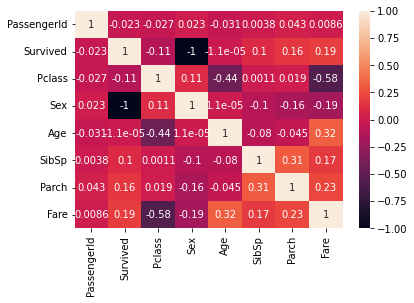

In [ ]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.023245,-0.026751,0.023245,-0.030874,0.003818,0.043080,0.008633
Survived,-0.023245,1.000000,-0.108615,-1.000000,-0.000011,0.099943,0.159120,0.192036
Pclass,-0.026751,-0.108615,1.000000,0.108615,-0.440782,0.001087,0.018721,-0.577313
Sex,0.023245,-1.000000,0.108615,1.000000,0.000011,-0.099943,-0.159120,-0.192036
Age,-0.030874,-0.000011,-0.440782,0.000011,1.000000,-0.079535,-0.045073,0.324568
SibSp,0.003818,0.099943,0.001087,-0.099943,-0.079535,1.000000,0.306895,0.171912
Parch,0.043080,0.159120,0.018721,-0.159120,-0.045073,0.306895,1.000000,0.230325
Fare,0.008633,0.192036,-0.577313,-0.192036,0.324568,0.171912,0.230325,1.000000


In [ ]:
df['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

(array([266.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 152.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

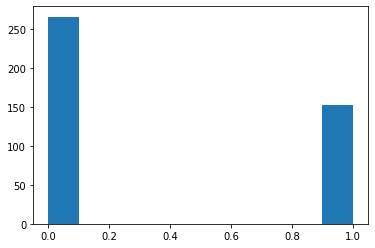

In [ ]:
plt.hist(df['Survived'])

In [ ]:
df['Survived'].value_counts()/np.float(len(df))*100

<ipython-input-10-d5d8f07719d8>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df['Survived'].value_counts()/np.float(len(df))*100


0    63.636364
1    36.363636
Name: Survived, dtype: float64

## Balancing the Number of death people with the survived rate.

In [ ]:
death_count =len(df[df['Survived']==0])
survived_count=len(df[df['Survived']==1])
print("Death count of Passengers = ",death_count)
print("Survived count of Passengers = ",survived_count)

Death count of Passengers =  266
Survived count of Passengers =  152


In [ ]:
death_index = df[df['Survived']==0].index
survived_index = df[df['Survived']==1].index
print(survived_index,death_index)

Int64Index([  1,   4,   6,   8,  12,  14,  15,  18,  19,  22,
            ...
            395, 397, 400, 402, 408, 409, 410, 411, 412, 414],
           dtype='int64', length=152) Int64Index([  0,   2,   3,   5,   7,   9,  10,  11,  13,  16,
            ...
            401, 403, 404, 405, 406, 407, 413, 415, 416, 417],
           dtype='int64', length=266)


## Randomly Picking up death indexes according to Number of people survived.

In [ ]:
new_balancedFrame = np.random.choice(death_index,survived_count,replace=False)
new_balancedFrame

array([ 28, 396, 171, 357,  17,  10,  67, 166, 405,  55, 181, 335, 228,
       287, 192, 297, 277, 334, 136, 102, 109, 244,  64, 236,  47, 260,
       348,  71, 337, 352, 205, 161, 274, 110, 145, 234, 295, 174, 338,
       270, 105, 387, 146,  21, 144, 230, 318,  99,  38, 259, 413, 193,
        81, 202, 406, 355, 386, 271, 267, 298, 253, 247,  93, 372, 211,
       257, 346, 308, 142, 401,  85, 340,   5, 373,  13, 293, 172,  75,
       126, 243, 229, 255,  46, 134,  20, 398, 201,  31, 135,  73, 300,
       320,  39, 210, 299,  58, 221, 245,  25, 363, 417, 290, 393, 321,
        97, 351,  41, 121, 130, 158, 131,  94, 312, 189, 344, 329, 328,
        51,   3, 139, 212,  34,  60,   9,  82, 170,  89, 198,  56, 394,
       191, 265,   2, 124,  27, 143, 261, 292, 301, 264, 151, 152, 128,
        61,  11, 370,  35, 281, 115,  80, 392, 341])

In [ ]:
df1 = df.iloc[new_balancedFrame]
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
28,920,0,1,"Brady, Mr. John Bertram",1,41.00000,0,0,113054,30.5000,A21,S
396,1288,0,3,"Colbert, Mr. Patrick",1,24.00000,0,0,371109,7.2500,NaN,Q
171,1063,0,3,"Zakarian, Mr. Ortin",1,27.00000,0,0,2670,7.2250,NaN,C
357,1249,0,3,"Lockyer, Mr. Edward",1,30.27259,0,0,1222,7.8792,NaN,S
17,909,0,3,"Assaf, Mr. Gerios",1,21.00000,0,0,2692,7.2250,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
281,1173,0,3,"Peacock, Master. Alfred Edward",1,0.75000,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
115,1007,0,3,"Chronopoulos, Mr. Demetrios",1,18.00000,1,0,2680,14.4542,NaN,C
80,972,0,3,"Boulos, Master. Akar",1,6.00000,1,1,2678,15.2458,NaN,C
392,1284,0,3,"Abbott, Master. Eugene Joseph",1,13.00000,0,2,C.A. 2673,20.2500,NaN,S


In [ ]:
df1['Survived'].value_counts()

0    152
Name: Survived, dtype: int64

## Concatenating the both dataframes.

In [ ]:
new_df=pd.concat([df1, df.iloc[survived_index]], axis = 0)
new_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
28,920,0,1,"Brady, Mr. John Bertram",1,41.00000,0,0,113054,30.5000,A21,S
396,1288,0,3,"Colbert, Mr. Patrick",1,24.00000,0,0,371109,7.2500,NaN,Q
171,1063,0,3,"Zakarian, Mr. Ortin",1,27.00000,0,0,2670,7.2250,NaN,C
357,1249,0,3,"Lockyer, Mr. Edward",1,30.27259,0,0,1222,7.8792,NaN,S
17,909,0,3,"Assaf, Mr. Gerios",1,21.00000,0,0,2692,7.2250,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
409,1301,1,3,"Peacock, Miss. Treasteall",0,3.00000,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
410,1302,1,3,"Naughton, Miss. Hannah",0,30.27259,0,0,365237,7.7500,NaN,Q
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",0,37.00000,1,0,19928,90.0000,C78,Q
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",0,28.00000,0,0,347086,7.7750,NaN,S


In [ ]:
new_df['Survived'].value_counts()

0    152
1    152
Name: Survived, dtype: int64

(array([152.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 152.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

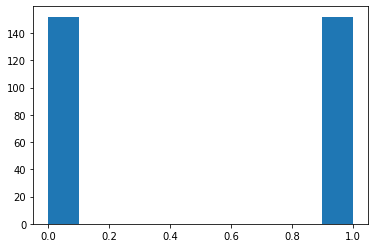

In [ ]:
plt.hist(new_df['Survived'])

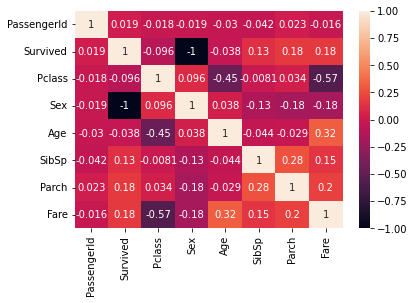

In [ ]:
import seaborn as sns
sns.heatmap(new_df.corr(),annot=True)

## Time for Model Training.

In [ ]:
X = new_df.drop(['Survived','Name','Cabin','Embarked','Ticket'],axis=1)
y = new_df['Survived'].values
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
28,920,1,1,41.00000,0,0,30.5000
396,1288,3,1,24.00000,0,0,7.2500
171,1063,3,1,27.00000,0,0,7.2250
357,1249,3,1,30.27259,0,0,7.8792
17,909,3,1,21.00000,0,0,7.2250
...,...,...,...,...,...,...,...
409,1301,3,0,3.00000,1,1,13.7750
410,1302,3,0,30.27259,0,0,7.7500
411,1303,1,0,37.00000,1,0,90.0000
412,1304,3,0,28.00000,0,0,7.7750


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## LDA 
## We need to take the n_components <= no. of output features.
## Example:- Here O/p is either 0 or 1 , so n_components will be either 2 or < 2.

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 1 )
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [ ]:
from sklearn.svm import SVC
svc=SVC() 
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 1.0000


## Making the confusion Matrix along with the accuracy.

In [ ]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[37  0]
 [ 0 39]]


1.0